In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

import zipfile
import os # Used to interact with the file system

In [2]:
sp07_17 = pd.read_csv("uc.berkeley.stem.pathways.2007.2017.txt", sep="\t", low_memory=False)
intended_cs = sp07_17[sp07_17['major.intended.department'] == 'L&S Computer Science']


## Looking at Prior Experience Impact on Intended/Declared CS Majors

This plot shows the number of intended CS majors by high school unweighted GPA. We find that the number of intended CS majors increases significantly as GPA increases.

Text(0, 0.5, 'Number of Intended CS majors')

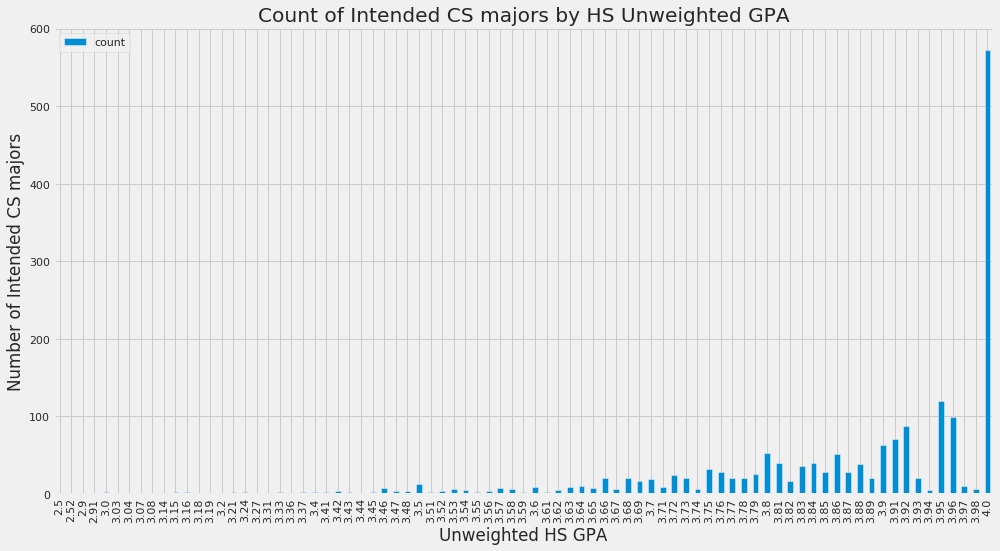

In [3]:
grouped = intended_cs.groupby(['hs.gpa.unweighted']).agg(sum)
ax = grouped.plot(y='count', kind='bar', figsize=[15,8])
# ax.set_xticklabels([2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
ax.set_title("Count of Intended CS majors by HS Unweighted GPA")
ax.set_xlabel('Unweighted HS GPA')
ax.set_ylabel('Number of Intended CS majors')

Text(0, 0.5, 'Number of Intended CS majors')

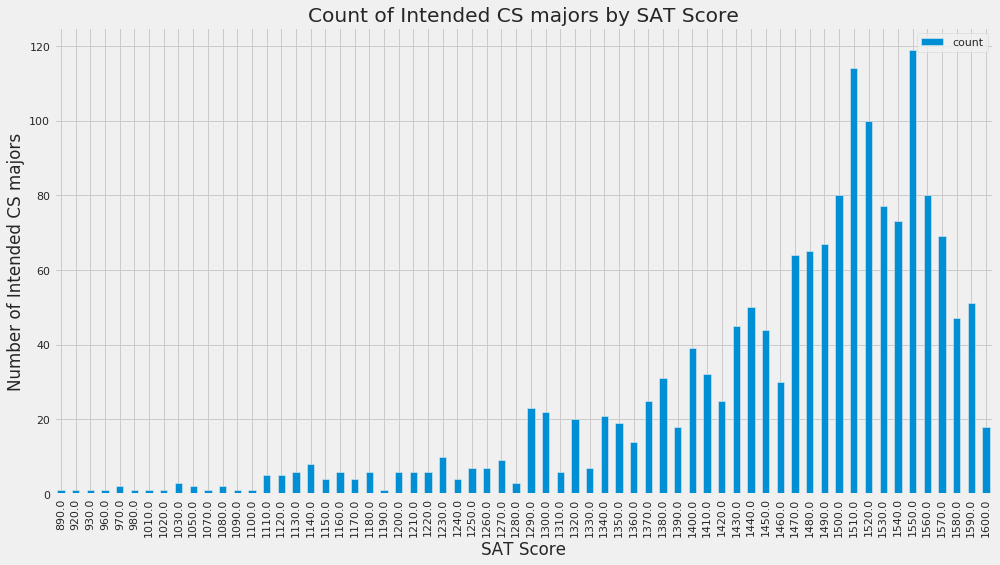

In [5]:
grouped_sat = intended_cs.groupby(['sat.total']).agg(sum)
ax = grouped_sat.plot(y='count', kind='bar', figsize=[15,8])
ax.set_title("Count of Intended CS majors by SAT Score")
ax.set_xlabel('SAT Score')
ax.set_ylabel('Number of Intended CS majors')

Text(0, 0.5, 'Number of Intended CS majors')

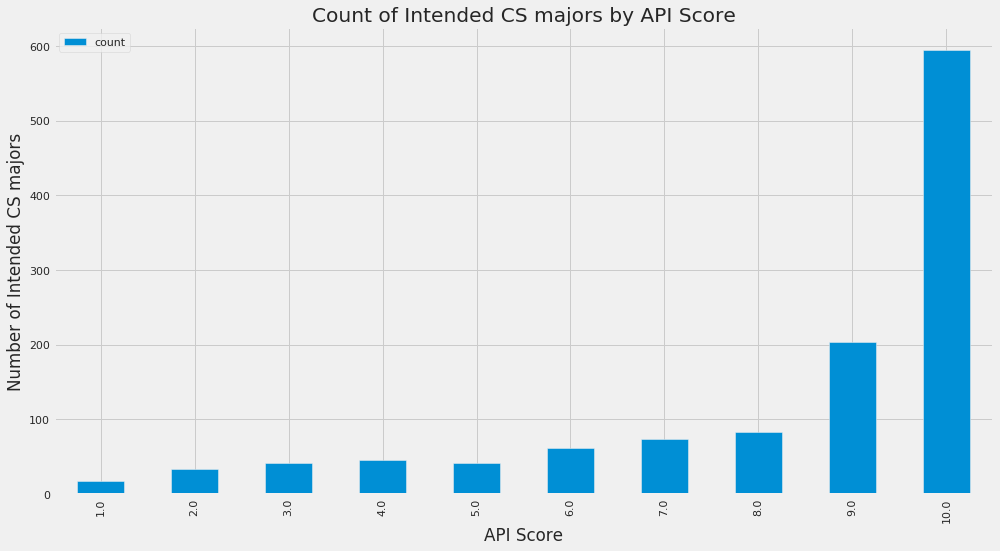

In [6]:
grouped_api = intended_cs.groupby(['hs.api']).agg(sum)
ax = grouped_api.plot(y='count', kind='bar', figsize=[15,8])
ax.set_title("Count of Intended CS majors by API Score")
ax.set_xlabel('API Score')
ax.set_ylabel('Number of Intended CS majors')

Text(0, 0.5, 'Number of Declared CS majors')

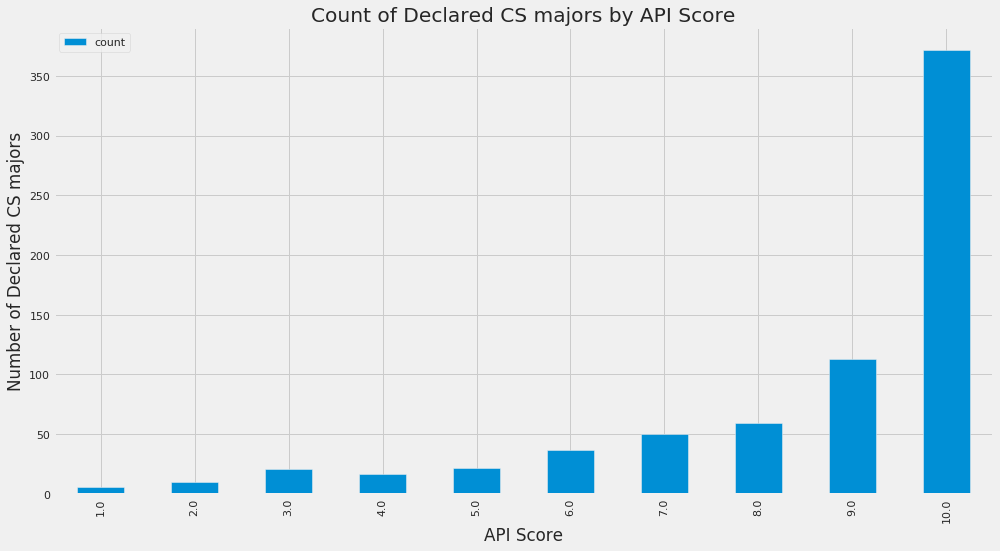

In [7]:
declared_cs_first = sp07_17[sp07_17['first.major.major.1'] == 'Computer Science']
grouped_api_d = declared_cs_first.groupby(['hs.api']).agg(sum)
ax = grouped_api_d.plot(y='count', kind='bar', figsize=[15,8])
ax.set_title("Count of Declared CS majors by API Score")
ax.set_xlabel('API Score')
ax.set_ylabel('Number of Declared CS majors')

In [8]:
grouped_api_d = grouped_api_d.rename(columns={'count': 'declared count'})
grouped_api = grouped_api.rename(columns={'count': 'intended count'})
result = pd.concat([grouped_api, grouped_api_d])

The graph below shows how the number of intended and declared CS majors is very much correlated with increasing high school API. *The API was discontinued in 2014 and has been replaced by the California School Dashboard. The API was a number, used for school accountability purposes, summarizing the performance of a group of students, a school, or a district on California’s standardized tests.* 

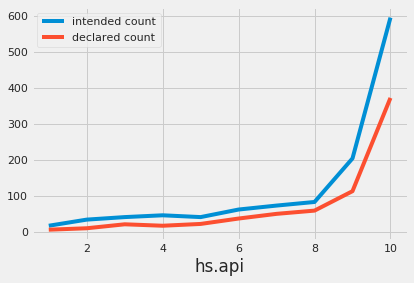

In [9]:
result.plot( y=['intended count', 'declared count'])

Text(0, 0.5, 'Number of Intended CS majors')

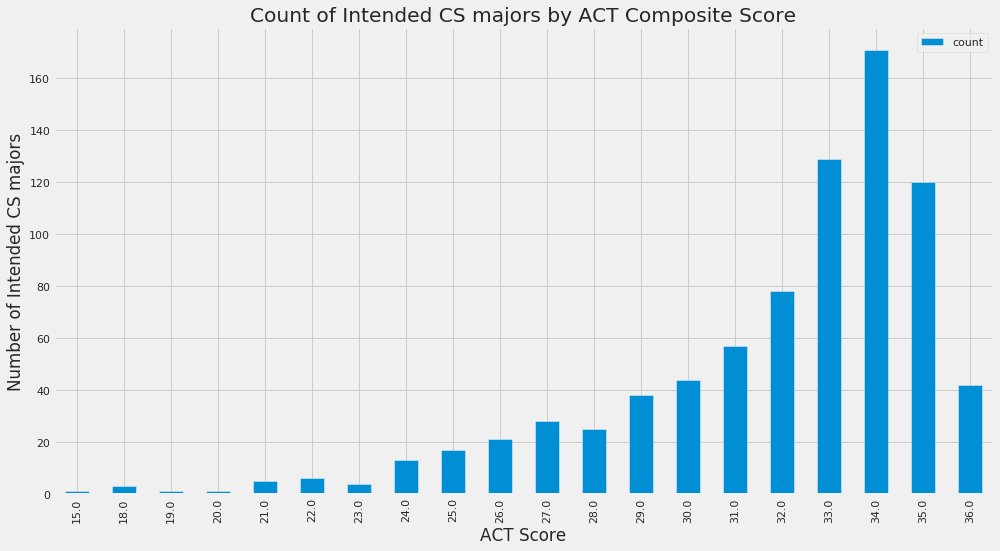

In [10]:
grouped_act = intended_cs.groupby(['act.composite']).agg(sum)
ax = grouped_act.plot(y='count', kind='bar', figsize=[15,8])
ax.set_title("Count of Intended CS majors by ACT Composite Score")
ax.set_xlabel('ACT Score')
ax.set_ylabel('Number of Intended CS majors')